# Lecture 14: Convolutional Neural Networks 

![](https://www.tensorflow.org/images/colab_logo_32px.png)
[Run in colab](https://colab.research.google.com/drive/1CxeEInBOmkXyYx-vBjKzYCh8Uaoccgsd)

In [1]:
import datetime
now = datetime.datetime.now()
print("Version: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Version: 2024-01-10 00:25:43


In [2]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_state(seed=42):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Motivation

### Visual cortex

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/eye_rods_cones.jpg" width="700px" style="display:block; margin:auto"/>

[[Image source](https://www.blueconemonochromacy.org/wp-content/uploads/2011/02/1_EN.jpg)]


Neurons in the visual cortex have a small local receptive field, i.e. only react to limited region of visual field.

Receptive fields of neurons overlap and together cover full visual field.

### Architecture of the visual cortex

Some neurons only sensitive to stimuli of certain structure, e.g. horizonal lines.

Some neurons have larger receptive fields, and are sensitive to stimuli that are combinations of lower-level patterns.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/localFov.jpeg" width="700px" style="display:block; margin:auto"/>

[Credit: Geron]

Corresponding architecture can detect complex patterns in full visual field, which inspires design of convolutional neural networks (CNNs).

## Convolution

Core building block of CNNs is convolution.

###  Graphical description

Convolution involves passing a filter (kernel) over an image and taking the sum of the product of terms for all positions.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/convolution-operation-14.png" width="700px" style="display:block; margin:auto"/>


<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/convolution-operation-24.png"  width="700px" style="display:block; margin:auto"/>


#### Animation of convolution

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/convolution.gif"  width="700px" style="display:block; margin:auto"/>

[[Animation source](https://miro.medium.com/max/1000/1*GcI7G-JLAQiEoCON7xFbhg.gif)]


###  Mathematical description

Convolution output is given by
\begin{align*}
z_{i,j} = \sum_{u,v} x_{u,v} w_{u-i,v-j},
\end{align*}
where $x$ is the input image, $w$ is the filter (kernel) and $i$ ($u$) and $j$ ($v$) denote row and column indices, respectively.

(Note that the kernel is not reflected as is typical in the usual mathematical definition of convolution.)

### Advantages

- Localisation: Capture local structure.
- Efficiency: weight sharing results in dramatic reduction in number of weights (parameters) compared to fully-connected neural network.
- Translational equivariance: Feature space behavies "nicely" under a translation of the input.  In a sense, learn general features rather than features for all locations of image.
- Composition: Can compose convolutions to extract more complex features.

## Convolutional layers

Define neural network layers using convolutions.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/geron_convolutional_layers.png"  width="700px" style="display:block; margin:auto"/>

[Credit: Geron]

Allows the network to focus on small low-level features in the first layer and use these to constuct higher-level features in next layer, and so on.  

Results in a hierarchical representation that is common in images of the real-world.

### Filters and features

Filters pull out corresponding features from image.  

Output of convolutional layer is typically called a *feature map*.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/geron_feature_maps.png"  width="700px" style="display:block; margin:auto"/>

[Credit: Geron]

During training, effective filters to extract representative features are learned.

### Padding

Nominally, convolution results in an output image that is *smaller* than the input.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/convolution-operation-24.png"  width="700px" style="display:block; margin:auto"/>

Various modifications to the nominal convolution are often considered.


#### Animation of convolution (no padding, no stride)

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/conv_no_padding_no_strides.gif"  width="500px" style="display:block; margin:auto"/>

[[Animation source](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_no_strides.gif)]

Blue pixels denote the input image, grey the convolutional kernel as it moves over the image, and green pixels denote the output.

Padding often introduced to control output size.

#### Animation of convolution (padding, no stride)

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/conv_arbitrary_padding_no_strides.gif"  width="500px" style="display:block; margin:auto">

[[Animation source](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/arbitrary_padding_no_strides.gif)]

Uncoloured pixels denote padding with zeros.

### Stride

#### Animation of convolution (no padding, stride)

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/conv_no_padding_strides.gif" width="500px" style="display:block; margin:auto"/>

[[Animation source](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_strides.gif)]

### Padding and stride

#### Animation of convolution (padding, stride)

stride means number of pixels moved, in this case it is 2

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/conv_padding_strides.gif" width="500px" style="display:block; margin:auto"/>

[[Animation source](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/padding_strides.gif)]

### Channels

#### Multiple input channels

Input images often have multiple channels, e.g. red, green and blue colour channels.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/rgb_2.jpg"  width="700px" style="display:block; margin:auto"/>

[[Image source](https://code.tutsplus.com/tutorials/create-a-retro-crt-distortion-effect-using-rgb-shifting--active-3359)]

Support multiple input channels by defining a filter for each channel and summing result.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/convolution-operation-on-volume5.png" width="700px" style="display:block; margin:auto"/>

#### Multiple input and output channels

Add a set of filters for each desired output channel.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/convolution-with-multiple-filters2.png"  width="700px" style="display:block; margin:auto"/>

#### Mathematical description

Convolution output is given by
\begin{align*}
z_{i,j,k_\text{out}} = \sum_{u,v,k_\text{in}} x_{u,v,k_\text{in}} w_{u-i,v-j,k_\text{in},k_\text{out}},
\end{align*}
where $x$ is the input image, $w$ is the filter (kernel) and $i$ ($u$) and $j$ ($v$) denote row and column indices, respectively.  The input channel index is denoted $k_\text{in}$ and the output channel index $k_\text{out}$.

Notice that the filter is now 4-dimensional.  We quickly add a lot of additional parameters.

### Non-linear activations

Convolutions usually followed by pointwise activation functions to introduce non-linearity (cf. fully-connected neural networks).

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/activation_func.png"  width="500px" style="display:block; margin:auto"/>

### Full convolutional layer

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/one-convolution-layer1.png"  width="900px" style="display:block; margin:auto"/>

## Pooling layers

Pooling layers are used to downsample to reduce the computational load, memory usage and number of parameters.

Retains equivariance to large translation and can introduce invariance to small translations.

### Max pooling

Take maximum over parent cell size, translating cell over image.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/pooling-layer3_max.png"  width="500px" style="display:block; margin:auto"/>

### Average pooling

Take average over parent cell size, translating cell over image.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/pooling-layer3_average.png"  width="500px" style="display:block; margin:auto"/>

### Multiple input channels

When considering multiple input channels, pooling is performed separately for each channel.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/pooling-on-volume1.png" width="500px" style="display:block; margin:auto"/>

## CNN architectures

### Stacking multiple feature maps

Convolutional layers typically stacked with multiple input and output channels, leading to multiple feature maps.

Neuron's receptor field extends across all previous layers' feature maps.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/stacked.jpeg"  width="700px" style="display:block; margin:auto"/>

[Credit: Geron]

### Basic CNN architecture

Basic CNN architecture typically consists of combining the following layers:
- Convolutions
- Non-linear activations
- Pooling

And repeating.

Final layers are then added on that are tailored to the problem at hand (often fully connected layers).

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/aCNN.jpeg" alt="Drawing"  width="1100px" style="display:block; margin:auto"/>

[Credit: Geron]

### CNN explainer

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/cnn_explainer.png"  width="700px" style="display:block; margin:auto"/>

The [CNN explainer](https://poloclub.github.io/cnn-explainer/) is a great visualisation tool, allowing you to look inside a CNN to visualise the layers making up a network.

### LeNet architecture

Convolutional layers first introduced by [Lecun et al.](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf) in 1998 for digital classification problem.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/lenet-52.png"  width="900px" style="display:block; margin:auto"/>

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/lenet_summary.png"  width="700px" style="display:block; margin:auto"/>

### AlexNet

[AlexNet](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf), which helped to intitiate the deep learning revolution in 2012, was based on a CNN architecture and showed a significant improvement in performance on the [ImageNet](https://www.image-net.org/) benchmark problem compared to the state-of-the-art at the time.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/alexnet.png"  width="900px" style="display:block; margin:auto"/>

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/alexnet_summary.png"  width="700px" style="display:block; margin:auto"/>

### VGG

The [VGG network](https://arxiv.org/abs/1409.1556) followed soon afterwards, making another significant improvement in performance, while simplifying the architecture.

VGG-16 uses 3x3 convolutions only and max pooling layers that step down by a factor of two at each stage.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/vgg16.png"  width="900px" style="display:block; margin:auto"/>



## Implementing CNNs in TensorFlow

### Load and set up data

Let's consider fashion MNIST again.

In [3]:
import tensorflow as tf
from tensorflow import keras

2024-01-10 00:25:44.549473: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 00:25:44.600874: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 00:25:44.601966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-01-10 00:25:45.420709: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Load fashion MNIST data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-30000], X_train_full[-30000:]
y_train, y_valid = y_train_full[:-30000], y_train_full[-30000:]

# Standardize
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Add final channel axis (one channel)
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

### Plot example data instance

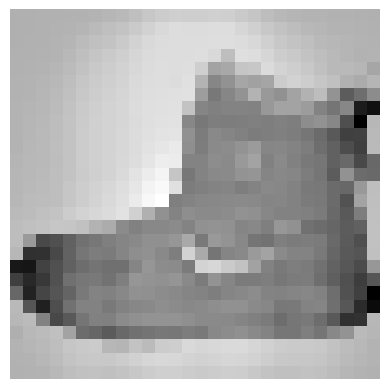

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

### Build CNN model

In [6]:
model = keras.models.Sequential([
    
    keras.layers.Conv2D(filters=4, kernel_size=7, activation="relu", padding="same", 
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Flatten(),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [7]:
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 28, 28, 4)         200       


 max_pooling2d (MaxPooling2  (None, 14, 14, 4)         0         


 D)                                                              


 flatten (Flatten)           (None, 784)               0         


 dense (Dense)               (None, 8)                 6280      


 dense_1 (Dense)             (None, 10)                90        


Total params: 6570 (25.66 KB)


Trainable params: 6570 (25.66 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


### Compile and fit model

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

Epoch 1/3



  1/938 [..............................] - ETA: 14:52 - loss: 2.4321 - accuracy: 0.1562


  7/938 [..............................] - ETA: 8s - loss: 2.3253 - accuracy: 0.1607   


 13/938 [..............................] - ETA: 8s - loss: 2.2660 - accuracy: 0.1779


 19/938 [..............................] - ETA: 8s - loss: 2.2391 - accuracy: 0.1809


 25/938 [..............................] - ETA: 8s - loss: 2.1872 - accuracy: 0.2037


 30/938 [..............................] - ETA: 8s - loss: 2.1454 - accuracy: 0.2333


 36/938 [>.............................] - ETA: 8s - loss: 2.0914 - accuracy: 0.2630


 42/938 [>.............................] - ETA: 8s - loss: 2.0319 - accuracy: 0.2932


 48/938 [>.............................] - ETA: 8s - loss: 1.9741 - accuracy: 0.3210


 54/938 [>.............................] - ETA: 8s - loss: 1.9340 - accuracy: 0.3443


 60/938 [>.............................] - ETA: 8s - loss: 1.9069 - accuracy: 0.3542


 66/938 [=>............................] - ETA: 8s - loss: 1.8621 - accuracy: 0.3745


 72/938 [=>............................] - ETA: 7s - loss: 1.8280 - accuracy: 0.3932


 78/938 [=>............................] - ETA: 7s - loss: 1.7917 - accuracy: 0.4091


 84/938 [=>............................] - ETA: 7s - loss: 1.7517 - accuracy: 0.4256


 90/938 [=>............................] - ETA: 7s - loss: 1.7165 - accuracy: 0.4385


 96/938 [==>...........................] - ETA: 7s - loss: 1.6892 - accuracy: 0.4476


102/938 [==>...........................] - ETA: 7s - loss: 1.6641 - accuracy: 0.4568


108/938 [==>...........................] - ETA: 7s - loss: 1.6338 - accuracy: 0.4676


114/938 [==>...........................] - ETA: 7s - loss: 1.6057 - accuracy: 0.4794


120/938 [==>...........................] - ETA: 7s - loss: 1.5772 - accuracy: 0.4906


126/938 [===>..........................] - ETA: 7s - loss: 1.5548 - accuracy: 0.4965


132/938 [===>..........................] - ETA: 7s - loss: 1.5343 - accuracy: 0.5028


138/938 [===>..........................] - ETA: 7s - loss: 1.5142 - accuracy: 0.5072


144/938 [===>..........................] - ETA: 7s - loss: 1.4923 - accuracy: 0.5130


150/938 [===>..........................] - ETA: 7s - loss: 1.4720 - accuracy: 0.5183


156/938 [===>..........................] - ETA: 7s - loss: 1.4528 - accuracy: 0.5248


162/938 [====>.........................] - ETA: 7s - loss: 1.4345 - accuracy: 0.5303


168/938 [====>.........................] - ETA: 7s - loss: 1.4165 - accuracy: 0.5365


174/938 [====>.........................] - ETA: 7s - loss: 1.3997 - accuracy: 0.5417


180/938 [====>.........................] - ETA: 6s - loss: 1.3822 - accuracy: 0.5484


186/938 [====>.........................] - ETA: 6s - loss: 1.3650 - accuracy: 0.5544


192/938 [=====>........................] - ETA: 6s - loss: 1.3464 - accuracy: 0.5605


198/938 [=====>........................] - ETA: 6s - loss: 1.3292 - accuracy: 0.5660


204/938 [=====>........................] - ETA: 6s - loss: 1.3151 - accuracy: 0.5708


210/938 [=====>........................] - ETA: 6s - loss: 1.3019 - accuracy: 0.5753


216/938 [=====>........................] - ETA: 6s - loss: 1.2862 - accuracy: 0.5809


222/938 [======>.......................] - ETA: 6s - loss: 1.2741 - accuracy: 0.5860


228/938 [======>.......................] - ETA: 6s - loss: 1.2619 - accuracy: 0.5894


234/938 [======>.......................] - ETA: 6s - loss: 1.2506 - accuracy: 0.5929


240/938 [======>.......................] - ETA: 6s - loss: 1.2454 - accuracy: 0.5948


246/938 [======>.......................] - ETA: 6s - loss: 1.2332 - accuracy: 0.5992


252/938 [=======>......................] - ETA: 6s - loss: 1.2222 - accuracy: 0.6029


258/938 [=======>......................] - ETA: 6s - loss: 1.2089 - accuracy: 0.6076


264/938 [=======>......................] - ETA: 6s - loss: 1.1991 - accuracy: 0.6115


270/938 [=======>......................] - ETA: 6s - loss: 1.1933 - accuracy: 0.6134


276/938 [=======>......................] - ETA: 6s - loss: 1.1823 - accuracy: 0.6173


282/938 [========>.....................] - ETA: 6s - loss: 1.1717 - accuracy: 0.6202


288/938 [========>.....................] - ETA: 5s - loss: 1.1609 - accuracy: 0.6238


294/938 [========>.....................] - ETA: 5s - loss: 1.1498 - accuracy: 0.6273


300/938 [========>.....................] - ETA: 5s - loss: 1.1391 - accuracy: 0.6309


306/938 [========>.....................] - ETA: 5s - loss: 1.1292 - accuracy: 0.6333


312/938 [========>.....................] - ETA: 5s - loss: 1.1196 - accuracy: 0.6352


318/938 [=========>....................] - ETA: 5s - loss: 1.1106 - accuracy: 0.6380


324/938 [=========>....................] - ETA: 5s - loss: 1.0999 - accuracy: 0.6412


330/938 [=========>....................] - ETA: 5s - loss: 1.0915 - accuracy: 0.6439


335/938 [=========>....................] - ETA: 5s - loss: 1.0845 - accuracy: 0.6461


341/938 [=========>....................] - ETA: 5s - loss: 1.0750 - accuracy: 0.6491


347/938 [==========>...................] - ETA: 5s - loss: 1.0658 - accuracy: 0.6523


353/938 [==========>...................] - ETA: 5s - loss: 1.0571 - accuracy: 0.6555


359/938 [==========>...................] - ETA: 5s - loss: 1.0502 - accuracy: 0.6576


365/938 [==========>...................] - ETA: 5s - loss: 1.0415 - accuracy: 0.6600


371/938 [==========>...................] - ETA: 5s - loss: 1.0331 - accuracy: 0.6634


377/938 [===========>..................] - ETA: 5s - loss: 1.0263 - accuracy: 0.6653


383/938 [===========>..................] - ETA: 5s - loss: 1.0183 - accuracy: 0.6681


389/938 [===========>..................] - ETA: 5s - loss: 1.0102 - accuracy: 0.6706


395/938 [===========>..................] - ETA: 5s - loss: 1.0022 - accuracy: 0.6727


401/938 [===========>..................] - ETA: 4s - loss: 0.9967 - accuracy: 0.6741


407/938 [============>.................] - ETA: 4s - loss: 0.9891 - accuracy: 0.6764


413/938 [============>.................] - ETA: 4s - loss: 0.9820 - accuracy: 0.6783


419/938 [============>.................] - ETA: 4s - loss: 0.9777 - accuracy: 0.6794


425/938 [============>.................] - ETA: 4s - loss: 0.9713 - accuracy: 0.6816


431/938 [============>.................] - ETA: 4s - loss: 0.9655 - accuracy: 0.6834


437/938 [============>.................] - ETA: 4s - loss: 0.9596 - accuracy: 0.6850


442/938 [=============>................] - ETA: 4s - loss: 0.9548 - accuracy: 0.6861


448/938 [=============>................] - ETA: 4s - loss: 0.9505 - accuracy: 0.6878


454/938 [=============>................] - ETA: 4s - loss: 0.9467 - accuracy: 0.6889


460/938 [=============>................] - ETA: 4s - loss: 0.9409 - accuracy: 0.6908


466/938 [=============>................] - ETA: 4s - loss: 0.9354 - accuracy: 0.6925


472/938 [==============>...............] - ETA: 4s - loss: 0.9300 - accuracy: 0.6944


478/938 [==============>...............] - ETA: 4s - loss: 0.9236 - accuracy: 0.6963


484/938 [==============>...............] - ETA: 4s - loss: 0.9182 - accuracy: 0.6976


490/938 [==============>...............] - ETA: 4s - loss: 0.9144 - accuracy: 0.6993


496/938 [==============>...............] - ETA: 4s - loss: 0.9112 - accuracy: 0.7000


502/938 [===============>..............] - ETA: 4s - loss: 0.9076 - accuracy: 0.7011


508/938 [===============>..............] - ETA: 3s - loss: 0.9022 - accuracy: 0.7027


514/938 [===============>..............] - ETA: 3s - loss: 0.8967 - accuracy: 0.7042


520/938 [===============>..............] - ETA: 3s - loss: 0.8934 - accuracy: 0.7050


526/938 [===============>..............] - ETA: 3s - loss: 0.8891 - accuracy: 0.7060


532/938 [================>.............] - ETA: 3s - loss: 0.8862 - accuracy: 0.7069


538/938 [================>.............] - ETA: 3s - loss: 0.8848 - accuracy: 0.7071


544/938 [================>.............] - ETA: 3s - loss: 0.8812 - accuracy: 0.7084


550/938 [================>.............] - ETA: 3s - loss: 0.8776 - accuracy: 0.7093


555/938 [================>.............] - ETA: 3s - loss: 0.8735 - accuracy: 0.7105


561/938 [================>.............] - ETA: 3s - loss: 0.8694 - accuracy: 0.7117


567/938 [=================>............] - ETA: 3s - loss: 0.8672 - accuracy: 0.7126


573/938 [=================>............] - ETA: 3s - loss: 0.8625 - accuracy: 0.7141


579/938 [=================>............] - ETA: 3s - loss: 0.8599 - accuracy: 0.7149


585/938 [=================>............] - ETA: 3s - loss: 0.8573 - accuracy: 0.7153


591/938 [=================>............] - ETA: 3s - loss: 0.8531 - accuracy: 0.7167


597/938 [==================>...........] - ETA: 3s - loss: 0.8498 - accuracy: 0.7176


603/938 [==================>...........] - ETA: 3s - loss: 0.8454 - accuracy: 0.7190


609/938 [==================>...........] - ETA: 3s - loss: 0.8420 - accuracy: 0.7197


615/938 [==================>...........] - ETA: 2s - loss: 0.8395 - accuracy: 0.7204


621/938 [==================>...........] - ETA: 2s - loss: 0.8358 - accuracy: 0.7216


627/938 [===================>..........] - ETA: 2s - loss: 0.8336 - accuracy: 0.7223


633/938 [===================>..........] - ETA: 2s - loss: 0.8323 - accuracy: 0.7224


639/938 [===================>..........] - ETA: 2s - loss: 0.8297 - accuracy: 0.7228


645/938 [===================>..........] - ETA: 2s - loss: 0.8273 - accuracy: 0.7235


651/938 [===================>..........] - ETA: 2s - loss: 0.8234 - accuracy: 0.7248


657/938 [====================>.........] - ETA: 2s - loss: 0.8203 - accuracy: 0.7258


663/938 [====================>.........] - ETA: 2s - loss: 0.8177 - accuracy: 0.7264


669/938 [====================>.........] - ETA: 2s - loss: 0.8154 - accuracy: 0.7272


675/938 [====================>.........] - ETA: 2s - loss: 0.8136 - accuracy: 0.7276


681/938 [====================>.........] - ETA: 2s - loss: 0.8099 - accuracy: 0.7288


687/938 [====================>.........] - ETA: 2s - loss: 0.8075 - accuracy: 0.7298


693/938 [=====================>........] - ETA: 2s - loss: 0.8059 - accuracy: 0.7303


699/938 [=====================>........] - ETA: 2s - loss: 0.8042 - accuracy: 0.7310


705/938 [=====================>........] - ETA: 2s - loss: 0.8021 - accuracy: 0.7316


711/938 [=====================>........] - ETA: 2s - loss: 0.7991 - accuracy: 0.7324


717/938 [=====================>........] - ETA: 2s - loss: 0.7967 - accuracy: 0.7333


723/938 [======================>.......] - ETA: 1s - loss: 0.7939 - accuracy: 0.7342


729/938 [======================>.......] - ETA: 1s - loss: 0.7911 - accuracy: 0.7350


735/938 [======================>.......] - ETA: 1s - loss: 0.7879 - accuracy: 0.7359


740/938 [======================>.......] - ETA: 1s - loss: 0.7860 - accuracy: 0.7362


746/938 [======================>.......] - ETA: 1s - loss: 0.7842 - accuracy: 0.7365


752/938 [=======================>......] - ETA: 1s - loss: 0.7826 - accuracy: 0.7370


758/938 [=======================>......] - ETA: 1s - loss: 0.7804 - accuracy: 0.7378


764/938 [=======================>......] - ETA: 1s - loss: 0.7782 - accuracy: 0.7383


769/938 [=======================>......] - ETA: 1s - loss: 0.7761 - accuracy: 0.7388


775/938 [=======================>......] - ETA: 1s - loss: 0.7736 - accuracy: 0.7396


781/938 [=======================>......] - ETA: 1s - loss: 0.7718 - accuracy: 0.7403


787/938 [========================>.....] - ETA: 1s - loss: 0.7698 - accuracy: 0.7408


793/938 [========================>.....] - ETA: 1s - loss: 0.7668 - accuracy: 0.7416


799/938 [========================>.....] - ETA: 1s - loss: 0.7645 - accuracy: 0.7423


805/938 [========================>.....] - ETA: 1s - loss: 0.7625 - accuracy: 0.7427


811/938 [========================>.....] - ETA: 1s - loss: 0.7595 - accuracy: 0.7436


817/938 [=========================>....] - ETA: 1s - loss: 0.7573 - accuracy: 0.7447


823/938 [=========================>....] - ETA: 1s - loss: 0.7553 - accuracy: 0.7453


829/938 [=========================>....] - ETA: 1s - loss: 0.7535 - accuracy: 0.7460


835/938 [=========================>....] - ETA: 0s - loss: 0.7510 - accuracy: 0.7469


841/938 [=========================>....] - ETA: 0s - loss: 0.7493 - accuracy: 0.7474


847/938 [==========================>...] - ETA: 0s - loss: 0.7473 - accuracy: 0.7480


853/938 [==========================>...] - ETA: 0s - loss: 0.7450 - accuracy: 0.7486


859/938 [==========================>...] - ETA: 0s - loss: 0.7429 - accuracy: 0.7494


864/938 [==========================>...] - ETA: 0s - loss: 0.7414 - accuracy: 0.7499


870/938 [==========================>...] - ETA: 0s - loss: 0.7394 - accuracy: 0.7505


876/938 [===========================>..] - ETA: 0s - loss: 0.7369 - accuracy: 0.7515


882/938 [===========================>..] - ETA: 0s - loss: 0.7347 - accuracy: 0.7523


888/938 [===========================>..] - ETA: 0s - loss: 0.7331 - accuracy: 0.7526


894/938 [===========================>..] - ETA: 0s - loss: 0.7312 - accuracy: 0.7532


900/938 [===========================>..] - ETA: 0s - loss: 0.7290 - accuracy: 0.7539


906/938 [===========================>..] - ETA: 0s - loss: 0.7277 - accuracy: 0.7544


912/938 [============================>.] - ETA: 0s - loss: 0.7264 - accuracy: 0.7548


918/938 [============================>.] - ETA: 0s - loss: 0.7242 - accuracy: 0.7554


924/938 [============================>.] - ETA: 0s - loss: 0.7226 - accuracy: 0.7559


930/938 [============================>.] - ETA: 0s - loss: 0.7210 - accuracy: 0.7564


936/938 [============================>.] - ETA: 0s - loss: 0.7189 - accuracy: 0.7569


938/938 [==============================] - 14s 14ms/step - loss: 0.7182 - accuracy: 0.7572 - val_loss: 0.5206 - val_accuracy: 0.8157


Epoch 2/3



  1/938 [..............................] - ETA: 10s - loss: 0.5667 - accuracy: 0.8438


  7/938 [..............................] - ETA: 8s - loss: 0.3947 - accuracy: 0.8750 


 13/938 [..............................] - ETA: 8s - loss: 0.3970 - accuracy: 0.8774


 19/938 [..............................] - ETA: 8s - loss: 0.4238 - accuracy: 0.8668


 25/938 [..............................] - ETA: 8s - loss: 0.4400 - accuracy: 0.8600


 31/938 [..............................] - ETA: 8s - loss: 0.4427 - accuracy: 0.8538


 37/938 [>.............................] - ETA: 8s - loss: 0.4358 - accuracy: 0.8530


 43/938 [>.............................] - ETA: 8s - loss: 0.4467 - accuracy: 0.8517


 49/938 [>.............................] - ETA: 8s - loss: 0.4401 - accuracy: 0.8501


 55/938 [>.............................] - ETA: 8s - loss: 0.4423 - accuracy: 0.8483


 61/938 [>.............................] - ETA: 8s - loss: 0.4299 - accuracy: 0.8514


 67/938 [=>............................] - ETA: 8s - loss: 0.4350 - accuracy: 0.8535


 73/938 [=>............................] - ETA: 8s - loss: 0.4350 - accuracy: 0.8515


 79/938 [=>............................] - ETA: 7s - loss: 0.4370 - accuracy: 0.8513


 85/938 [=>............................] - ETA: 7s - loss: 0.4367 - accuracy: 0.8522


 91/938 [=>............................] - ETA: 7s - loss: 0.4376 - accuracy: 0.8506


 97/938 [==>...........................] - ETA: 7s - loss: 0.4380 - accuracy: 0.8512


103/938 [==>...........................] - ETA: 7s - loss: 0.4393 - accuracy: 0.8492


109/938 [==>...........................] - ETA: 7s - loss: 0.4410 - accuracy: 0.8478


115/938 [==>...........................] - ETA: 7s - loss: 0.4436 - accuracy: 0.8467


121/938 [==>...........................] - ETA: 7s - loss: 0.4416 - accuracy: 0.8461


127/938 [===>..........................] - ETA: 7s - loss: 0.4409 - accuracy: 0.8455


133/938 [===>..........................] - ETA: 7s - loss: 0.4417 - accuracy: 0.8456


139/938 [===>..........................] - ETA: 7s - loss: 0.4412 - accuracy: 0.8462


145/938 [===>..........................] - ETA: 7s - loss: 0.4412 - accuracy: 0.8459


151/938 [===>..........................] - ETA: 7s - loss: 0.4417 - accuracy: 0.8462


157/938 [====>.........................] - ETA: 7s - loss: 0.4399 - accuracy: 0.8469


163/938 [====>.........................] - ETA: 7s - loss: 0.4400 - accuracy: 0.8474


169/938 [====>.........................] - ETA: 7s - loss: 0.4394 - accuracy: 0.8471


175/938 [====>.........................] - ETA: 7s - loss: 0.4396 - accuracy: 0.8482


181/938 [====>.........................] - ETA: 6s - loss: 0.4390 - accuracy: 0.8481


187/938 [====>.........................] - ETA: 6s - loss: 0.4401 - accuracy: 0.8471


193/938 [=====>........................] - ETA: 6s - loss: 0.4375 - accuracy: 0.8478


199/938 [=====>........................] - ETA: 6s - loss: 0.4379 - accuracy: 0.8472


205/938 [=====>........................] - ETA: 6s - loss: 0.4390 - accuracy: 0.8471


211/938 [=====>........................] - ETA: 6s - loss: 0.4427 - accuracy: 0.8460


217/938 [=====>........................] - ETA: 6s - loss: 0.4408 - accuracy: 0.8471


223/938 [======>.......................] - ETA: 6s - loss: 0.4402 - accuracy: 0.8473


229/938 [======>.......................] - ETA: 6s - loss: 0.4409 - accuracy: 0.8485


235/938 [======>.......................] - ETA: 6s - loss: 0.4394 - accuracy: 0.8489


241/938 [======>.......................] - ETA: 6s - loss: 0.4397 - accuracy: 0.8484


247/938 [======>.......................] - ETA: 6s - loss: 0.4411 - accuracy: 0.8478


253/938 [=======>......................] - ETA: 6s - loss: 0.4429 - accuracy: 0.8475


259/938 [=======>......................] - ETA: 6s - loss: 0.4430 - accuracy: 0.8470


265/938 [=======>......................] - ETA: 6s - loss: 0.4422 - accuracy: 0.8474


271/938 [=======>......................] - ETA: 6s - loss: 0.4431 - accuracy: 0.8467


277/938 [=======>......................] - ETA: 6s - loss: 0.4420 - accuracy: 0.8469


283/938 [========>.....................] - ETA: 6s - loss: 0.4411 - accuracy: 0.8470


289/938 [========>.....................] - ETA: 5s - loss: 0.4413 - accuracy: 0.8470


295/938 [========>.....................] - ETA: 5s - loss: 0.4408 - accuracy: 0.8469


301/938 [========>.....................] - ETA: 5s - loss: 0.4414 - accuracy: 0.8466


307/938 [========>.....................] - ETA: 5s - loss: 0.4413 - accuracy: 0.8464


313/938 [=========>....................] - ETA: 5s - loss: 0.4388 - accuracy: 0.8472


319/938 [=========>....................] - ETA: 5s - loss: 0.4376 - accuracy: 0.8478


325/938 [=========>....................] - ETA: 5s - loss: 0.4387 - accuracy: 0.8466


331/938 [=========>....................] - ETA: 5s - loss: 0.4413 - accuracy: 0.8459


337/938 [=========>....................] - ETA: 5s - loss: 0.4409 - accuracy: 0.8459


343/938 [=========>....................] - ETA: 5s - loss: 0.4394 - accuracy: 0.8466


349/938 [==========>...................] - ETA: 5s - loss: 0.4392 - accuracy: 0.8466


355/938 [==========>...................] - ETA: 5s - loss: 0.4402 - accuracy: 0.8469


361/938 [==========>...................] - ETA: 5s - loss: 0.4406 - accuracy: 0.8466


367/938 [==========>...................] - ETA: 5s - loss: 0.4393 - accuracy: 0.8471


372/938 [==========>...................] - ETA: 5s - loss: 0.4387 - accuracy: 0.8474


378/938 [===========>..................] - ETA: 5s - loss: 0.4388 - accuracy: 0.8472


384/938 [===========>..................] - ETA: 5s - loss: 0.4376 - accuracy: 0.8475


390/938 [===========>..................] - ETA: 5s - loss: 0.4376 - accuracy: 0.8477


396/938 [===========>..................] - ETA: 4s - loss: 0.4366 - accuracy: 0.8483


402/938 [===========>..................] - ETA: 4s - loss: 0.4375 - accuracy: 0.8478


408/938 [============>.................] - ETA: 4s - loss: 0.4374 - accuracy: 0.8480


414/938 [============>.................] - ETA: 4s - loss: 0.4388 - accuracy: 0.8471


420/938 [============>.................] - ETA: 4s - loss: 0.4388 - accuracy: 0.8473


426/938 [============>.................] - ETA: 4s - loss: 0.4385 - accuracy: 0.8474


432/938 [============>.................] - ETA: 4s - loss: 0.4381 - accuracy: 0.8471


438/938 [=============>................] - ETA: 4s - loss: 0.4364 - accuracy: 0.8478


444/938 [=============>................] - ETA: 4s - loss: 0.4356 - accuracy: 0.8479


450/938 [=============>................] - ETA: 4s - loss: 0.4341 - accuracy: 0.8486


456/938 [=============>................] - ETA: 4s - loss: 0.4342 - accuracy: 0.8486


462/938 [=============>................] - ETA: 4s - loss: 0.4333 - accuracy: 0.8487


468/938 [=============>................] - ETA: 4s - loss: 0.4323 - accuracy: 0.8492


474/938 [==============>...............] - ETA: 4s - loss: 0.4328 - accuracy: 0.8494


480/938 [==============>...............] - ETA: 4s - loss: 0.4326 - accuracy: 0.8492


486/938 [==============>...............] - ETA: 4s - loss: 0.4320 - accuracy: 0.8492


492/938 [==============>...............] - ETA: 4s - loss: 0.4315 - accuracy: 0.8493


498/938 [==============>...............] - ETA: 4s - loss: 0.4311 - accuracy: 0.8493


504/938 [===============>..............] - ETA: 3s - loss: 0.4315 - accuracy: 0.8493


510/938 [===============>..............] - ETA: 3s - loss: 0.4320 - accuracy: 0.8489


516/938 [===============>..............] - ETA: 3s - loss: 0.4323 - accuracy: 0.8488


522/938 [===============>..............] - ETA: 3s - loss: 0.4319 - accuracy: 0.8492


528/938 [===============>..............] - ETA: 3s - loss: 0.4315 - accuracy: 0.8493


534/938 [================>.............] - ETA: 3s - loss: 0.4324 - accuracy: 0.8491


540/938 [================>.............] - ETA: 3s - loss: 0.4311 - accuracy: 0.8498


546/938 [================>.............] - ETA: 3s - loss: 0.4323 - accuracy: 0.8496


552/938 [================>.............] - ETA: 3s - loss: 0.4313 - accuracy: 0.8500


558/938 [================>.............] - ETA: 3s - loss: 0.4305 - accuracy: 0.8500


564/938 [=================>............] - ETA: 3s - loss: 0.4297 - accuracy: 0.8502


570/938 [=================>............] - ETA: 3s - loss: 0.4285 - accuracy: 0.8505


576/938 [=================>............] - ETA: 3s - loss: 0.4282 - accuracy: 0.8507


582/938 [=================>............] - ETA: 3s - loss: 0.4275 - accuracy: 0.8507


588/938 [=================>............] - ETA: 3s - loss: 0.4272 - accuracy: 0.8510


593/938 [=================>............] - ETA: 3s - loss: 0.4281 - accuracy: 0.8509


599/938 [==================>...........] - ETA: 3s - loss: 0.4276 - accuracy: 0.8513


605/938 [==================>...........] - ETA: 3s - loss: 0.4272 - accuracy: 0.8513


611/938 [==================>...........] - ETA: 3s - loss: 0.4261 - accuracy: 0.8518


617/938 [==================>...........] - ETA: 2s - loss: 0.4263 - accuracy: 0.8517


623/938 [==================>...........] - ETA: 2s - loss: 0.4266 - accuracy: 0.8518


629/938 [===================>..........] - ETA: 2s - loss: 0.4270 - accuracy: 0.8516


635/938 [===================>..........] - ETA: 2s - loss: 0.4270 - accuracy: 0.8514


641/938 [===================>..........] - ETA: 2s - loss: 0.4279 - accuracy: 0.8511


647/938 [===================>..........] - ETA: 2s - loss: 0.4274 - accuracy: 0.8509


653/938 [===================>..........] - ETA: 2s - loss: 0.4271 - accuracy: 0.8511


659/938 [====================>.........] - ETA: 2s - loss: 0.4275 - accuracy: 0.8509


665/938 [====================>.........] - ETA: 2s - loss: 0.4271 - accuracy: 0.8511


671/938 [====================>.........] - ETA: 2s - loss: 0.4263 - accuracy: 0.8513


677/938 [====================>.........] - ETA: 2s - loss: 0.4268 - accuracy: 0.8512


683/938 [====================>.........] - ETA: 2s - loss: 0.4262 - accuracy: 0.8514


689/938 [=====================>........] - ETA: 2s - loss: 0.4263 - accuracy: 0.8514


695/938 [=====================>........] - ETA: 2s - loss: 0.4264 - accuracy: 0.8514


701/938 [=====================>........] - ETA: 2s - loss: 0.4258 - accuracy: 0.8517


707/938 [=====================>........] - ETA: 2s - loss: 0.4263 - accuracy: 0.8512


713/938 [=====================>........] - ETA: 2s - loss: 0.4258 - accuracy: 0.8512


719/938 [=====================>........] - ETA: 2s - loss: 0.4254 - accuracy: 0.8515


725/938 [======================>.......] - ETA: 1s - loss: 0.4261 - accuracy: 0.8516


731/938 [======================>.......] - ETA: 1s - loss: 0.4258 - accuracy: 0.8516


737/938 [======================>.......] - ETA: 1s - loss: 0.4255 - accuracy: 0.8516


743/938 [======================>.......] - ETA: 1s - loss: 0.4262 - accuracy: 0.8513


749/938 [======================>.......] - ETA: 1s - loss: 0.4254 - accuracy: 0.8513


755/938 [=======================>......] - ETA: 1s - loss: 0.4253 - accuracy: 0.8514


761/938 [=======================>......] - ETA: 1s - loss: 0.4255 - accuracy: 0.8511


767/938 [=======================>......] - ETA: 1s - loss: 0.4251 - accuracy: 0.8512


773/938 [=======================>......] - ETA: 1s - loss: 0.4242 - accuracy: 0.8514


779/938 [=======================>......] - ETA: 1s - loss: 0.4246 - accuracy: 0.8514


785/938 [========================>.....] - ETA: 1s - loss: 0.4246 - accuracy: 0.8517


791/938 [========================>.....] - ETA: 1s - loss: 0.4249 - accuracy: 0.8515


797/938 [========================>.....] - ETA: 1s - loss: 0.4253 - accuracy: 0.8513


803/938 [========================>.....] - ETA: 1s - loss: 0.4251 - accuracy: 0.8512


809/938 [========================>.....] - ETA: 1s - loss: 0.4248 - accuracy: 0.8512


813/938 [=========================>....] - ETA: 1s - loss: 0.4242 - accuracy: 0.8515


818/938 [=========================>....] - ETA: 1s - loss: 0.4236 - accuracy: 0.8517


822/938 [=========================>....] - ETA: 1s - loss: 0.4233 - accuracy: 0.8518


826/938 [=========================>....] - ETA: 1s - loss: 0.4238 - accuracy: 0.8520


831/938 [=========================>....] - ETA: 0s - loss: 0.4232 - accuracy: 0.8522


837/938 [=========================>....] - ETA: 0s - loss: 0.4236 - accuracy: 0.8521


843/938 [=========================>....] - ETA: 0s - loss: 0.4236 - accuracy: 0.8521


849/938 [==========================>...] - ETA: 0s - loss: 0.4245 - accuracy: 0.8518


855/938 [==========================>...] - ETA: 0s - loss: 0.4245 - accuracy: 0.8518


861/938 [==========================>...] - ETA: 0s - loss: 0.4243 - accuracy: 0.8517


867/938 [==========================>...] - ETA: 0s - loss: 0.4250 - accuracy: 0.8515


873/938 [==========================>...] - ETA: 0s - loss: 0.4248 - accuracy: 0.8516


879/938 [===========================>..] - ETA: 0s - loss: 0.4249 - accuracy: 0.8515


885/938 [===========================>..] - ETA: 0s - loss: 0.4248 - accuracy: 0.8515


891/938 [===========================>..] - ETA: 0s - loss: 0.4252 - accuracy: 0.8514


897/938 [===========================>..] - ETA: 0s - loss: 0.4256 - accuracy: 0.8513


903/938 [===========================>..] - ETA: 0s - loss: 0.4256 - accuracy: 0.8512


909/938 [============================>.] - ETA: 0s - loss: 0.4254 - accuracy: 0.8513


915/938 [============================>.] - ETA: 0s - loss: 0.4256 - accuracy: 0.8516


921/938 [============================>.] - ETA: 0s - loss: 0.4251 - accuracy: 0.8517


927/938 [============================>.] - ETA: 0s - loss: 0.4249 - accuracy: 0.8517


933/938 [============================>.] - ETA: 0s - loss: 0.4249 - accuracy: 0.8518


938/938 [==============================] - 13s 13ms/step - loss: 0.4250 - accuracy: 0.8519 - val_loss: 0.4190 - val_accuracy: 0.8567


Epoch 3/3



  1/938 [..............................] - ETA: 9s - loss: 0.2851 - accuracy: 0.9062


  7/938 [..............................] - ETA: 8s - loss: 0.3609 - accuracy: 0.8750


 13/938 [..............................] - ETA: 8s - loss: 0.3731 - accuracy: 0.8678


 19/938 [..............................] - ETA: 8s - loss: 0.3633 - accuracy: 0.8668


 25/938 [..............................] - ETA: 8s - loss: 0.3762 - accuracy: 0.8700


 31/938 [..............................] - ETA: 8s - loss: 0.3746 - accuracy: 0.8669


 37/938 [>.............................] - ETA: 8s - loss: 0.3650 - accuracy: 0.8699


 43/938 [>.............................] - ETA: 8s - loss: 0.3647 - accuracy: 0.8735


 49/938 [>.............................] - ETA: 8s - loss: 0.3767 - accuracy: 0.8686


 55/938 [>.............................] - ETA: 8s - loss: 0.3807 - accuracy: 0.8682


 61/938 [>.............................] - ETA: 7s - loss: 0.3802 - accuracy: 0.8653


 67/938 [=>............................] - ETA: 7s - loss: 0.3791 - accuracy: 0.8657


 73/938 [=>............................] - ETA: 7s - loss: 0.3861 - accuracy: 0.8643


 79/938 [=>............................] - ETA: 7s - loss: 0.3912 - accuracy: 0.8623


 85/938 [=>............................] - ETA: 7s - loss: 0.3884 - accuracy: 0.8647


 91/938 [=>............................] - ETA: 7s - loss: 0.3880 - accuracy: 0.8668


 97/938 [==>...........................] - ETA: 7s - loss: 0.3873 - accuracy: 0.8660


103/938 [==>...........................] - ETA: 7s - loss: 0.3864 - accuracy: 0.8668


109/938 [==>...........................] - ETA: 7s - loss: 0.3846 - accuracy: 0.8673


115/938 [==>...........................] - ETA: 7s - loss: 0.3868 - accuracy: 0.8660


121/938 [==>...........................] - ETA: 7s - loss: 0.3869 - accuracy: 0.8639


127/938 [===>..........................] - ETA: 7s - loss: 0.3820 - accuracy: 0.8659


133/938 [===>..........................] - ETA: 7s - loss: 0.3811 - accuracy: 0.8665


139/938 [===>..........................] - ETA: 7s - loss: 0.3800 - accuracy: 0.8662


145/938 [===>..........................] - ETA: 7s - loss: 0.3760 - accuracy: 0.8681


151/938 [===>..........................] - ETA: 7s - loss: 0.3756 - accuracy: 0.8696


157/938 [====>.........................] - ETA: 7s - loss: 0.3732 - accuracy: 0.8700


163/938 [====>.........................] - ETA: 7s - loss: 0.3766 - accuracy: 0.8687


169/938 [====>.........................] - ETA: 6s - loss: 0.3794 - accuracy: 0.8680


175/938 [====>.........................] - ETA: 6s - loss: 0.3815 - accuracy: 0.8682


181/938 [====>.........................] - ETA: 6s - loss: 0.3853 - accuracy: 0.8669


187/938 [====>.........................] - ETA: 6s - loss: 0.3850 - accuracy: 0.8668


193/938 [=====>........................] - ETA: 6s - loss: 0.3858 - accuracy: 0.8664


199/938 [=====>........................] - ETA: 6s - loss: 0.3836 - accuracy: 0.8676


205/938 [=====>........................] - ETA: 6s - loss: 0.3825 - accuracy: 0.8681


211/938 [=====>........................] - ETA: 6s - loss: 0.3849 - accuracy: 0.8673


217/938 [=====>........................] - ETA: 6s - loss: 0.3850 - accuracy: 0.8669


222/938 [======>.......................] - ETA: 6s - loss: 0.3833 - accuracy: 0.8675


228/938 [======>.......................] - ETA: 6s - loss: 0.3853 - accuracy: 0.8666


234/938 [======>.......................] - ETA: 6s - loss: 0.3857 - accuracy: 0.8669


240/938 [======>.......................] - ETA: 6s - loss: 0.3878 - accuracy: 0.8655


246/938 [======>.......................] - ETA: 6s - loss: 0.3875 - accuracy: 0.8657


252/938 [=======>......................] - ETA: 6s - loss: 0.3899 - accuracy: 0.8648


258/938 [=======>......................] - ETA: 6s - loss: 0.3890 - accuracy: 0.8647


263/938 [=======>......................] - ETA: 6s - loss: 0.3895 - accuracy: 0.8650


269/938 [=======>......................] - ETA: 6s - loss: 0.3886 - accuracy: 0.8656


275/938 [=======>......................] - ETA: 6s - loss: 0.3869 - accuracy: 0.8664


281/938 [=======>......................] - ETA: 5s - loss: 0.3871 - accuracy: 0.8662


287/938 [========>.....................] - ETA: 5s - loss: 0.3878 - accuracy: 0.8662


293/938 [========>.....................] - ETA: 5s - loss: 0.3882 - accuracy: 0.8656


299/938 [========>.....................] - ETA: 5s - loss: 0.3895 - accuracy: 0.8649


305/938 [========>.....................] - ETA: 5s - loss: 0.3900 - accuracy: 0.8644


311/938 [========>.....................] - ETA: 5s - loss: 0.3894 - accuracy: 0.8645


317/938 [=========>....................] - ETA: 5s - loss: 0.3897 - accuracy: 0.8640


323/938 [=========>....................] - ETA: 5s - loss: 0.3908 - accuracy: 0.8638


329/938 [=========>....................] - ETA: 5s - loss: 0.3912 - accuracy: 0.8638


335/938 [=========>....................] - ETA: 5s - loss: 0.3907 - accuracy: 0.8641


341/938 [=========>....................] - ETA: 5s - loss: 0.3911 - accuracy: 0.8639


347/938 [==========>...................] - ETA: 5s - loss: 0.3909 - accuracy: 0.8641


353/938 [==========>...................] - ETA: 5s - loss: 0.3912 - accuracy: 0.8641


359/938 [==========>...................] - ETA: 5s - loss: 0.3922 - accuracy: 0.8638


365/938 [==========>...................] - ETA: 5s - loss: 0.3922 - accuracy: 0.8635


371/938 [==========>...................] - ETA: 5s - loss: 0.3927 - accuracy: 0.8635


377/938 [===========>..................] - ETA: 5s - loss: 0.3921 - accuracy: 0.8636


383/938 [===========>..................] - ETA: 5s - loss: 0.3946 - accuracy: 0.8626


389/938 [===========>..................] - ETA: 5s - loss: 0.3954 - accuracy: 0.8622


395/938 [===========>..................] - ETA: 4s - loss: 0.3945 - accuracy: 0.8627


401/938 [===========>..................] - ETA: 4s - loss: 0.3934 - accuracy: 0.8631


407/938 [============>.................] - ETA: 4s - loss: 0.3926 - accuracy: 0.8633


413/938 [============>.................] - ETA: 4s - loss: 0.3917 - accuracy: 0.8633


419/938 [============>.................] - ETA: 4s - loss: 0.3914 - accuracy: 0.8634


425/938 [============>.................] - ETA: 4s - loss: 0.3907 - accuracy: 0.8638


431/938 [============>.................] - ETA: 4s - loss: 0.3916 - accuracy: 0.8635


437/938 [============>.................] - ETA: 4s - loss: 0.3918 - accuracy: 0.8633


443/938 [=============>................] - ETA: 4s - loss: 0.3915 - accuracy: 0.8631


449/938 [=============>................] - ETA: 4s - loss: 0.3900 - accuracy: 0.8637


455/938 [=============>................] - ETA: 4s - loss: 0.3899 - accuracy: 0.8638


461/938 [=============>................] - ETA: 4s - loss: 0.3892 - accuracy: 0.8639


467/938 [=============>................] - ETA: 4s - loss: 0.3885 - accuracy: 0.8641


473/938 [==============>...............] - ETA: 4s - loss: 0.3887 - accuracy: 0.8640


479/938 [==============>...............] - ETA: 4s - loss: 0.3877 - accuracy: 0.8644


485/938 [==============>...............] - ETA: 4s - loss: 0.3875 - accuracy: 0.8648


491/938 [==============>...............] - ETA: 4s - loss: 0.3881 - accuracy: 0.8646


497/938 [==============>...............] - ETA: 4s - loss: 0.3878 - accuracy: 0.8649


503/938 [===============>..............] - ETA: 3s - loss: 0.3879 - accuracy: 0.8650


509/938 [===============>..............] - ETA: 3s - loss: 0.3876 - accuracy: 0.8651


515/938 [===============>..............] - ETA: 3s - loss: 0.3868 - accuracy: 0.8652


521/938 [===============>..............] - ETA: 3s - loss: 0.3881 - accuracy: 0.8650


527/938 [===============>..............] - ETA: 3s - loss: 0.3891 - accuracy: 0.8649


533/938 [================>.............] - ETA: 3s - loss: 0.3892 - accuracy: 0.8647


539/938 [================>.............] - ETA: 3s - loss: 0.3891 - accuracy: 0.8646


545/938 [================>.............] - ETA: 3s - loss: 0.3891 - accuracy: 0.8642


551/938 [================>.............] - ETA: 3s - loss: 0.3892 - accuracy: 0.8642


557/938 [================>.............] - ETA: 3s - loss: 0.3885 - accuracy: 0.8643


563/938 [=================>............] - ETA: 3s - loss: 0.3877 - accuracy: 0.8645


569/938 [=================>............] - ETA: 3s - loss: 0.3876 - accuracy: 0.8646


575/938 [=================>............] - ETA: 3s - loss: 0.3874 - accuracy: 0.8649


581/938 [=================>............] - ETA: 3s - loss: 0.3880 - accuracy: 0.8645


587/938 [=================>............] - ETA: 3s - loss: 0.3885 - accuracy: 0.8642


593/938 [=================>............] - ETA: 3s - loss: 0.3883 - accuracy: 0.8643


599/938 [==================>...........] - ETA: 3s - loss: 0.3882 - accuracy: 0.8644


605/938 [==================>...........] - ETA: 3s - loss: 0.3880 - accuracy: 0.8644


611/938 [==================>...........] - ETA: 2s - loss: 0.3878 - accuracy: 0.8645


617/938 [==================>...........] - ETA: 2s - loss: 0.3867 - accuracy: 0.8651


623/938 [==================>...........] - ETA: 2s - loss: 0.3866 - accuracy: 0.8653


629/938 [===================>..........] - ETA: 2s - loss: 0.3867 - accuracy: 0.8652


635/938 [===================>..........] - ETA: 2s - loss: 0.3858 - accuracy: 0.8656


641/938 [===================>..........] - ETA: 2s - loss: 0.3861 - accuracy: 0.8655


647/938 [===================>..........] - ETA: 2s - loss: 0.3863 - accuracy: 0.8656


653/938 [===================>..........] - ETA: 2s - loss: 0.3859 - accuracy: 0.8657


657/938 [====================>.........] - ETA: 2s - loss: 0.3857 - accuracy: 0.8659


663/938 [====================>.........] - ETA: 2s - loss: 0.3861 - accuracy: 0.8658


669/938 [====================>.........] - ETA: 2s - loss: 0.3855 - accuracy: 0.8660


675/938 [====================>.........] - ETA: 2s - loss: 0.3847 - accuracy: 0.8663


681/938 [====================>.........] - ETA: 2s - loss: 0.3851 - accuracy: 0.8662


686/938 [====================>.........] - ETA: 2s - loss: 0.3853 - accuracy: 0.8660


692/938 [=====================>........] - ETA: 2s - loss: 0.3852 - accuracy: 0.8659


698/938 [=====================>........] - ETA: 2s - loss: 0.3848 - accuracy: 0.8661


704/938 [=====================>........] - ETA: 2s - loss: 0.3848 - accuracy: 0.8662


710/938 [=====================>........] - ETA: 2s - loss: 0.3847 - accuracy: 0.8662


716/938 [=====================>........] - ETA: 2s - loss: 0.3845 - accuracy: 0.8661


722/938 [======================>.......] - ETA: 1s - loss: 0.3847 - accuracy: 0.8659


728/938 [======================>.......] - ETA: 1s - loss: 0.3843 - accuracy: 0.8657


734/938 [======================>.......] - ETA: 1s - loss: 0.3849 - accuracy: 0.8657


740/938 [======================>.......] - ETA: 1s - loss: 0.3842 - accuracy: 0.8659


746/938 [======================>.......] - ETA: 1s - loss: 0.3842 - accuracy: 0.8660


752/938 [=======================>......] - ETA: 1s - loss: 0.3839 - accuracy: 0.8661


758/938 [=======================>......] - ETA: 1s - loss: 0.3846 - accuracy: 0.8658


764/938 [=======================>......] - ETA: 1s - loss: 0.3840 - accuracy: 0.8662


770/938 [=======================>......] - ETA: 1s - loss: 0.3833 - accuracy: 0.8666


776/938 [=======================>......] - ETA: 1s - loss: 0.3835 - accuracy: 0.8665


782/938 [========================>.....] - ETA: 1s - loss: 0.3837 - accuracy: 0.8662


788/938 [========================>.....] - ETA: 1s - loss: 0.3844 - accuracy: 0.8658


794/938 [========================>.....] - ETA: 1s - loss: 0.3843 - accuracy: 0.8659


799/938 [========================>.....] - ETA: 1s - loss: 0.3846 - accuracy: 0.8658


805/938 [========================>.....] - ETA: 1s - loss: 0.3835 - accuracy: 0.8660


811/938 [========================>.....] - ETA: 1s - loss: 0.3837 - accuracy: 0.8661


817/938 [=========================>....] - ETA: 1s - loss: 0.3842 - accuracy: 0.8660


822/938 [=========================>....] - ETA: 1s - loss: 0.3848 - accuracy: 0.8659


828/938 [=========================>....] - ETA: 1s - loss: 0.3846 - accuracy: 0.8660


834/938 [=========================>....] - ETA: 0s - loss: 0.3848 - accuracy: 0.8659


840/938 [=========================>....] - ETA: 0s - loss: 0.3849 - accuracy: 0.8658


846/938 [==========================>...] - ETA: 0s - loss: 0.3850 - accuracy: 0.8659


852/938 [==========================>...] - ETA: 0s - loss: 0.3847 - accuracy: 0.8660


858/938 [==========================>...] - ETA: 0s - loss: 0.3837 - accuracy: 0.8662


864/938 [==========================>...] - ETA: 0s - loss: 0.3832 - accuracy: 0.8663


870/938 [==========================>...] - ETA: 0s - loss: 0.3831 - accuracy: 0.8662


875/938 [==========================>...] - ETA: 0s - loss: 0.3828 - accuracy: 0.8664


881/938 [===========================>..] - ETA: 0s - loss: 0.3824 - accuracy: 0.8665


887/938 [===========================>..] - ETA: 0s - loss: 0.3822 - accuracy: 0.8667


893/938 [===========================>..] - ETA: 0s - loss: 0.3818 - accuracy: 0.8668


899/938 [===========================>..] - ETA: 0s - loss: 0.3816 - accuracy: 0.8669


905/938 [===========================>..] - ETA: 0s - loss: 0.3815 - accuracy: 0.8668


911/938 [============================>.] - ETA: 0s - loss: 0.3813 - accuracy: 0.8668


917/938 [============================>.] - ETA: 0s - loss: 0.3804 - accuracy: 0.8672


923/938 [============================>.] - ETA: 0s - loss: 0.3804 - accuracy: 0.8674


929/938 [============================>.] - ETA: 0s - loss: 0.3806 - accuracy: 0.8675


935/938 [============================>.] - ETA: 0s - loss: 0.3807 - accuracy: 0.8673


938/938 [==============================] - 12s 13ms/step - loss: 0.3808 - accuracy: 0.8672 - val_loss: 0.4114 - val_accuracy: 0.8592



  1/313 [..............................] - ETA: 6s - loss: 0.6347 - accuracy: 0.7812


 13/313 [>.............................] - ETA: 1s - loss: 0.3799 - accuracy: 0.8750


 25/313 [=>............................] - ETA: 1s - loss: 0.4115 - accuracy: 0.8725


 37/313 [==>...........................] - ETA: 1s - loss: 0.4176 - accuracy: 0.8606


 49/313 [===>..........................] - ETA: 1s - loss: 0.4099 - accuracy: 0.8610


 61/313 [====>.........................] - ETA: 1s - loss: 0.4030 - accuracy: 0.8607


 73/313 [=====>........................] - ETA: 1s - loss: 0.4051 - accuracy: 0.8604


 85/313 [=======>......................] - ETA: 0s - loss: 0.4150 - accuracy: 0.8562


 97/313 [========>.....................] - ETA: 0s - loss: 0.4268 - accuracy: 0.8528


109/313 [=========>....................] - ETA: 0s - loss: 0.4359 - accuracy: 0.8521


121/313 [==========>...................] - ETA: 0s - loss: 0.4335 - accuracy: 0.8538


132/313 [===========>..................] - ETA: 0s - loss: 0.4429 - accuracy: 0.8501


144/313 [============>.................] - ETA: 0s - loss: 0.4344 - accuracy: 0.8533


156/313 [=============>................] - ETA: 0s - loss: 0.4355 - accuracy: 0.8526


168/313 [===============>..............] - ETA: 0s - loss: 0.4408 - accuracy: 0.8510


180/313 [================>.............] - ETA: 0s - loss: 0.4454 - accuracy: 0.8505


192/313 [=================>............] - ETA: 0s - loss: 0.4426 - accuracy: 0.8506


204/313 [==================>...........] - ETA: 0s - loss: 0.4414 - accuracy: 0.8505


216/313 [===================>..........] - ETA: 0s - loss: 0.4410 - accuracy: 0.8500


229/313 [====================>.........] - ETA: 0s - loss: 0.4383 - accuracy: 0.8507


241/313 [======================>.......] - ETA: 0s - loss: 0.4341 - accuracy: 0.8518


253/313 [=======================>......] - ETA: 0s - loss: 0.4355 - accuracy: 0.8502


265/313 [========================>.....] - ETA: 0s - loss: 0.4335 - accuracy: 0.8506


277/313 [=========================>....] - ETA: 0s - loss: 0.4348 - accuracy: 0.8500


289/313 [==========================>...] - ETA: 0s - loss: 0.4383 - accuracy: 0.8488


301/313 [===========================>..] - ETA: 0s - loss: 0.4389 - accuracy: 0.8485


313/313 [==============================] - 1s 4ms/step - loss: 0.4359 - accuracy: 0.8493


[0.4358906149864197, 0.8493000268936157]

**Exercises:** *You can now complete Exercise 1 in the exercises associated with this lecture.*